<a href="https://colab.research.google.com/github/gustavol3ma/PO/blob/main/P_O(aula).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as distancia_euclidiana
from itertools import permutations as permutation
!pip install deap
from deap import creator, base, tools, algorithms
import numpy as np


In [2]:
origem = (0,0)
destino =(4,4)

enderecos = [(2,1),(2,2),(8,3),(5,3)]

In [3]:
rota = [origem] + enderecos + [destino]

In [4]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

Distância percorrida: 13.73


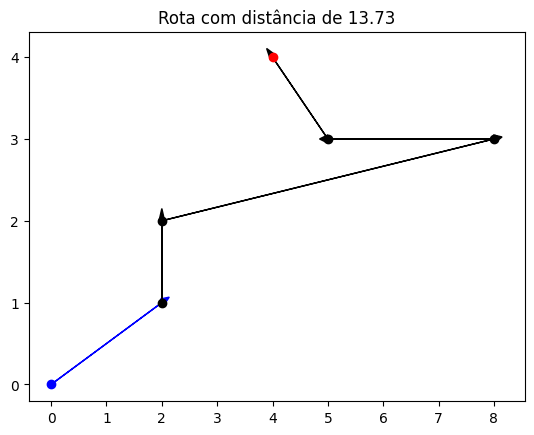

In [5]:
tamanho_rota = len(rota)
distancia_percorrida = 0

for i in range(tamanho_rota):
  x,y = rota[i]
  cor= 'black'
  if i == 0:
    cor = 'blue'
  elif i == tamanho_rota -1:
    cor = 'red'

  plt.scatter(x,y ,color=cor)
  if i < tamanho_rota -1:
    x1,y1 = rota[i+1]
    dx = x1 - x
    dy = y1 - y
    plt.arrow(x,y,dx,dy , color=cor,head_width=0.1)
    distancia_percorrida += distancia_euclidiana(rota[i],rota[i+1])
plt.title(f'Rota com distância de {distancia_percorrida:.2f}')
print(f'Distância percorrida: {distancia_percorrida:.2f}')
plt.show()

In [6]:
def desenhar_rota(rota):

  tamanho_rota = len(rota)
  distancia_percorrida = 0

  for i in range(tamanho_rota):
    x,y = rota[i]
    cor= 'black'
    if i == 0:
      cor = 'blue'
    elif i == tamanho_rota -1:
      cor = 'red'

    plt.scatter(x,y ,color=cor)
    if i < tamanho_rota -1:
      x1,y1 = rota[i+1]
      dx = x1 - x
      dy = y1 - y
      plt.arrow(x,y,dx,dy , color=cor,head_width=0.1)
      distancia_percorrida += distancia_euclidiana(rota[i],rota[i+1])
  plt.title(f'Rota com distância de {distancia_percorrida:.2f}')
  print(f'Distância percorrida: {distancia_percorrida:.2f}')
  plt.show()

Distância percorrida: 14.56


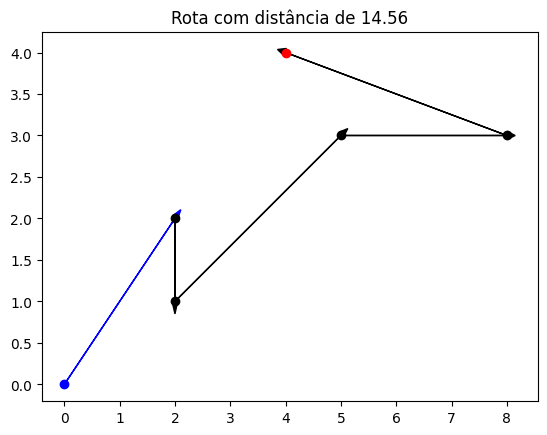

In [7]:
origem = (0,0)
destino =(4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3)]
rota = [origem] + enderecos + [destino]
desenhar_rota(rota)

In [8]:
def calcular_distancia_rota(rota):
  distancia=0
  tamanha_rota=len(rota)
  for i in range(tamanho_rota):
    if i < tamanho_rota -1:
      distancia += distancia_euclidiana(rota[i],rota[i+1])
  return distancia

Melhor rota: None
Menor distância: 13.52145126328583
Distância percorrida: 13.52


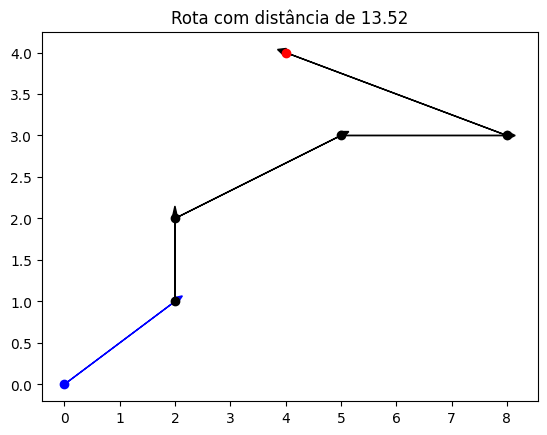

In [9]:
menor_distancia = float('inf')
melhor_rota = None
for permutacao in permutation(enderecos):
  rota = [origem] + list(permutacao) + [destino]
  distancia_rota = calcular_distancia_rota(rota)

  if distancia_rota < menor_distancia:
    menor_distancia = distancia_rota
    menor_rota = rota

print(f'Melhor rota: {melhor_rota}')
print(f'Menor distância: {menor_distancia}')
desenhar_rota(menor_rota)

In [10]:
def forca_bruta(origem,destino,enderecos):
  menor_distancia = float('inf')
  melhor_rota = None
  for permutacao in permutation(enderecos):
    rota = [origem] + list(permutacao) + [destino]
    distancia_rota = calcular_distancia_rota(rota)

    if distancia_rota < menor_distancia:
      menor_distancia = distancia_rota
      menor_rota = rota
  return menor_rota,menor_distancia

In [11]:
'''
Vai demorar para fazer a execução, pois na lista de endereços existem 10 pares. Logo,
será preciso um poder computacional maior para realizar os cálculos da melhor rota.


origem = (0,0)
destino =(4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

menor_rota,menor_distancia = forca_bruta(origem,destino,enderecos)
desenhar_rota(menor_rota)

'''



'\nVai demorar para fazer a execução, pois na lista de endereços existem 10 pares. Logo,\nserá preciso um poder computacional maior para realizar os cálculos da melhor rota.\n\n\norigem = (0,0)\ndestino =(4,4)\n\nenderecos = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]\n\nmenor_rota,menor_distancia = forca_bruta(origem,destino,enderecos)\ndesenhar_rota(menor_rota)\n\n'

In [12]:
origem = (0,0)
destino =(4,4)

enderecos = [(2,2),(2,1),(5,3),(8,3)]

In [13]:
def vizinho_mais_proximo(origem,destino,enderecos):

  ponto_atual = origem
  enderecos_restantes = enderecos.copy()

  distancia_percorrida = 0
  menor_rota = [ponto_atual]


  while enderecos_restantes:

    #Encontrar o ponto mais prox. do ponto atual
    menor_distancia = float('inf')
    ponto_mais_proximo = None
    for endereco in enderecos_restantes:
      distancia = distancia_euclidiana(ponto_atual,endereco)
      if distancia < menor_distancia:
        menor_distancia = distancia
        ponto_mais_proximo = endereco

    #Remover esse ponto da lista de enderecos
    enderecos_restantes.remove(ponto_mais_proximo)
    #Adicionar esse ponto na menor rota
    menor_rota.append(ponto_mais_proximo )
    #Atualizar a distância percorrida
    distancia_percorrida = distancia_percorrida + menor_distancia
    #Atualizar ponto atual
    ponto_atual = ponto_mais_proximo

  menor_rota.append(destino)
  distancia_percorrida = distancia_percorrida + distancia_euclidiana(ponto_atual,endereco)

  return menor_rota,distancia_percorrida

Distância percorrida: 20.45


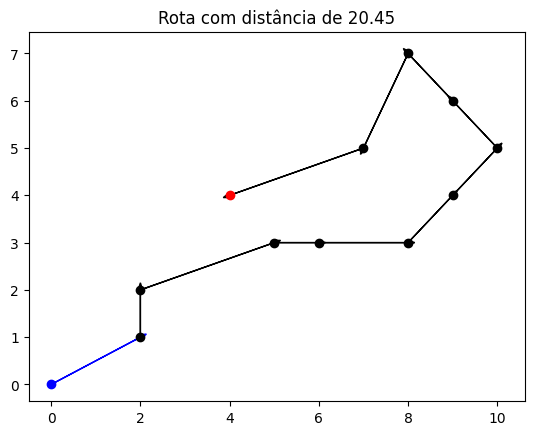

In [14]:
origem1= (0,0)
destino1 =(4,4)

enderecos1 = [(2,2),(2,1),(5,3),(8,3),(10,5),(9,4),(8,7),(6,3),(9,6),(7,5)]

menor_rota , menor_distancia = vizinho_mais_proximo(origem1,destino1,enderecos1)
desenhar_rota(menor_rota)


In [15]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,1),(2,2),(5,3),(8,3)]
individuo = (0,1,2,3)

In [16]:
def avaliar(individuo,origem,enderecos,destino):
  rota = [origem]
  for i in individuo:
    rota.append(enderecos[i])
  rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(rota)

  return distancia_percorrida,

In [17]:
tam_populacao_inicial = 100
prob_cruzamento = 0.7
prob_mutacao = 0.1
numero_geracoes = 100


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("Genes", np.random.permutation, len(enderecos))
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
populacao = toolbox.Populacao(n=tam_populacao_inicial)


toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,
                                mutpb=prob_cruzamento,
                                ngen=numero_geracoes,
                                verbose=False)

melhor_ind = tools.selBest(populacao, 1)[0]


In [18]:
melhor_ind

[np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

Distância percorrida: 13.52


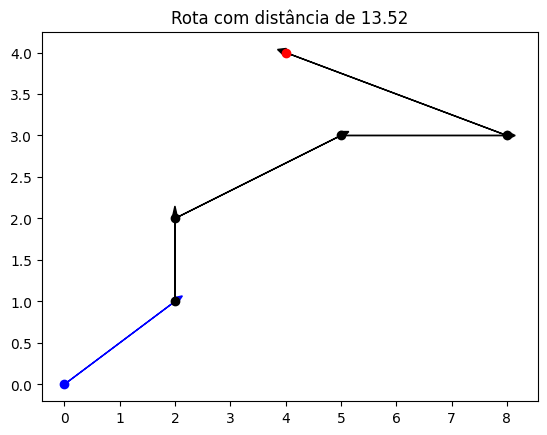

In [20]:
menor_rota = [origem]
for i in melhor_ind:
  menor_rota.append(enderecos[i])
menor_rota.append(destino)

desenhar_rota(menor_rota)

In [22]:
def algoritmos_geneticos(origem,destino,enderecos, tam_populacao_inicial=10
                       ,prob_cruzamento = 0.7,prob_mutacao = 0.1,numero_geracoes = 100 ):


  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
  creator.create("Individuo", list, fitness=creator.FitnessMin)

  toolbox = base.Toolbox()
  toolbox.register("Genes", np.random.permutation, len(enderecos))
  toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

  toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
  populacao = toolbox.Populacao(n=tam_populacao_inicial)


  toolbox.register("mate", tools.cxPartialyMatched)
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
  toolbox.register("select", tools.selTournament, tournsize=3)
  toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

  algoritmo = algorithms.eaSimple(populacao,
                                  toolbox,
                                  cxpb=prob_cruzamento,
                                  mutpb=prob_cruzamento,
                                  ngen=numero_geracoes,
                                  verbose=False)

  melhor_ind = tools.selBest(populacao, 1)[0]